# The Iris Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The dataset contains a set of 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.

Firstly, let's select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.1.0'

In [3]:
import tensorflow as tf

print (tf.__version__)

2.1.0


In [0]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Import dataset
- Import iris dataset
- Import the dataset using sklearn library

In [0]:
# Import pandas 
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()


## Question 2

### Get features and label from the dataset in separate variable
- you can get the features using .data method
- you can get the features using .target method

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Question 3

from sklearn.model_selection import train_test_split### Create train and test data
- use train_test_split to get train and test set
- set a random_state: 1
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Question 4

In [17]:
X_train.shape

(112, 4)

### One-hot encode the labels
- convert class vectors (integers) to binary class matrix
- convert labels
- number of classes: 3
- we are doing this to use categorical_crossentropy as loss

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3, dtype='float32')

## Question 5

### Initialize a sequential model
- Define a sequential model

In [0]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.advanced_activations import ReLU

## Question 6

### Add a layer
- Use Dense Layer  with input shape of 4 (according to the feature set) and number of outputs set to 3
- Apply Softmax on Dense Layer outputs

In [0]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(4,)))

# Add an output layer 
model.add(Dense(3, activation='softmax'))




## Question 7

### Compile the model
- Use SGD as Optimizer
- Use categorical_crossentropy as loss function
- Use accuracy as metrics

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


## Question 8

### Summarize the model
- Check model layers
- Understand number of trainable parameters

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- Give train data as training features and labels
- Epochs: 100
- Give validation data as testing features and labels

In [0]:

epochs = 100
batch_size = 112

## Question 10

### Make predictions
- Predict labels on one row

In [53]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=True)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)

Train on 78 samples, validate on 34 samples
Epoch 1/100
78/78 [==============================] - 0s 4ms/sample - loss: 1.5972 - accuracy: 0.3205 - val_loss: 1.2160 - val_accuracy: 0.4118
Epoch 2/100
78/78 [==============================] - 0s 147us/sample - loss: 1.4507 - accuracy: 0.3205 - val_loss: 1.1561 - val_accuracy: 0.4118
Epoch 3/100
78/78 [==============================] - 0s 167us/sample - loss: 1.3640 - accuracy: 0.3205 - val_loss: 1.1246 - val_accuracy: 0.4706
Epoch 4/100
78/78 [==============================] - 0s 159us/sample - loss: 1.3066 - accuracy: 0.3590 - val_loss: 1.1052 - val_accuracy: 0.6176
Epoch 5/100
78/78 [==============================] - 0s 128us/sample - loss: 1.2635 - accuracy: 0.5256 - val_loss: 1.0911 - val_accuracy: 0.5882
Epoch 6/100
78/78 [==============================] - 0s 143us/sample - loss: 1.2285 - accuracy: 0.4487 - val_loss: 1.0799 - val_accuracy: 0.4412
Epoch 7/100
78/78 [==============================] - 0s 142us/sample - loss: 1.1989 - ac

In [0]:
y_pred = np.round(model.predict(X_test))

[0.4117647, 0.4117647, 0.47058824, 0.61764705, 0.5882353, 0.44117647, 0.4117647, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.38235295, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.4117647, 0.5, 0.5, 0.5294118, 0.5588235, 0.5588235, 0.5588235, 0.5882353, 0.64705884, 0.6764706, 0.6764706, 0.6764706, 0.6764706, 0.6764706, 0.6764706, 0.7058824, 0.7058824, 0.7058824, 0.7352941, 0.7352941, 0.7352941, 0.7352941, 0.7352941, 0.7352941, 0.7352941, 0.7352941, 0.7647059, 0.7647059, 0.7647059, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.7941176, 0.8235294, 0.823529

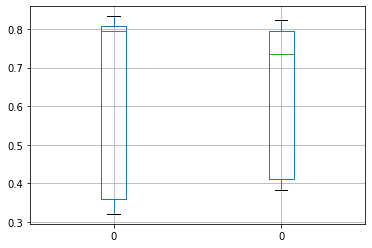

In [54]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

### Compare the prediction with actual label
- Print the same row as done in the previous step but of actual labels

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.895




---



# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

Firstly, let's select TensorFlow version 2.x in colab

In [55]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.1.0'

In [0]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [57]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

Saving prices.csv to prices.csv


KeyboardInterrupt: ignored

In [65]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount("/content/gdrive/MyDrive/Colab Notebooks/")

ValueError: ignored

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import pandas 
import pandas as pd
import numpy as np



prices = pd.read_csv("/content/prices.csv", sep=',')



## Question 2

### Drop null
- Drop null values if any

In [75]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [81]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [77]:
prices.shape

(515035, 7)

### Drop columnns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [0]:
### Drop columnns
prices.drop(['date','volume','symbol'], axis = 1, inplace = True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [87]:
prices.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [0]:
Y = prices[['close']]
X = prices[['open','low','high']]

## Question 4

### Create train and test sets
- Split the data into training and testing

In [0]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0) #70/30 split

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [0]:
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

### Reshape features
- Reshape the features to make it suitable for input in the model 

In [0]:
#x_train.shape[0]
#x_train.shape[1]
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#y_train = y_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [142]:
x_train.shape

(360524, 3, 1)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
#from keras.layers.advanced_activations import linear

# define the model architecture

# Initialize the constructor
model = Sequential([Flatten(), Dense (1,activation= 'linear')])




## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='sgd'
              )



## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [159]:
epochs = 50
batch_size = 128
#model.fit(x_train, y_train, epochs=epochs)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=True)
#loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

Train on 252366 samples, validate on 108158 samples
Epoch 1/50
252366/252366 [==============================] - 3s 13us/sample - loss: 0.6766 - val_loss: 0.6722
Epoch 2/50
252366/252366 [==============================] - 3s 14us/sample - loss: 0.6740 - val_loss: 0.6686
Epoch 3/50
252366/252366 [==============================] - 3s 14us/sample - loss: 0.6738 - val_loss: 0.6622
Epoch 4/50
252366/252366 [==============================] - 3s 14us/sample - loss: 0.6709 - val_loss: 0.6694
Epoch 5/50
252366/252366 [==============================] - 3s 14us/sample - loss: 0.6683 - val_loss: 0.6683
Epoch 6/50
252366/252366 [==============================] - 3s 14us/sample - loss: 0.6678 - val_loss: 0.6669
Epoch 7/50
252366/252366 [==============================] - 3s 13us/sample - loss: 0.6644 - val_loss: 0.6628
Epoch 8/50
252366/252366 [==============================] - 3s 13us/sample - loss: 0.6626 - val_loss: 0.6526
Epoch 9/50
252366/252366 [==============================] - 3s 13us/sample -

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [0]:
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [0]:
new_record = [123.430000, 122.30999, 116.250000]
new_record = scaler.transform([new_record])

In [167]:
y_predict = model.predict(new_record)
y_predict

array([[119.912865]], dtype=float32)